In [265]:
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy.linalg as l

%matplotlib inline

In [286]:
e = 1e-10
EPLISON = 1e-5

class PLA:
    def __init__(self, N):
        self.N = N
        self.w = np.array(([e, e, e]))
        
    def run(self):
        self.generate_data()
        self.pla()
        self.plot()
        
    def generate_data(self):
        # generate N data point
        x = [random.uniform(-1, 1) for i in range(self.N)]
        y = [random.uniform(-1, 1) for i in range(self.N)]
        self.D = np.array([[1.0, x[i], y[i]] for i in range(self.N)])
        # generate weight_expected 
        [x1, y1, x2, y2] = [random.uniform(-1, 1) for i in range(4)]
        w0 = -(x1*y2-x2*y1)
        w1 = (y2-y1)
        w2 = -(x2-x1)

        self.W = np.array([w0, w1, w2])
        self.L = [int(np.sign(self.W.dot(d))) for d in self.D]
        
    def plot(self):
        # plot the data seperation
        for i, l in enumerate(self.L):
            if(l == 1): plt.scatter(self.D[i][1], self.D[i][2], edgecolors='r', facecolors='none')
            else: plt.scatter(self.D[i][1], self.D[i][2], edgecolors='b', facecolors='none')
        
        # plot the line
        x = np.linspace(-1, 1, 100)
        y = -(self.W[1]*x + self.W[0])/self.W[2]
        plt.plot(x, y, 'black', label="IDEAL")
        
        y_hat = -(self.w[1]*x + self.w[0])/self.w[2]
        plt.plot(x, y_hat, 'red', label='PLA')

        plt.legend()
        plt.xlim((-1, 1))
        plt.ylim((-1, 1))
        plt.show()
        
    def pla(self):
        # run the weight

        NotClassified = True
        first = True
        randomOrder = np.random.randint(0, high=self.N, size=(self.N,))
        while(NotClassified and ((self.W.dot(self.w)/(l.norm(self.W)*l.norm(self.w)))<1-EPLISON)):
            NotClassified = False
            if(first):
                first = False
                self.w = self.L[randomOrder[0]]*self.D[randomOrder[0]]
                
            for i in randomOrder:
                if(int(np.sign(self.w.dot(self.D[i])) != self.L[i])):
                    NotClassified = True
                    self.w = self.w + self.L[i]*self.D[i]



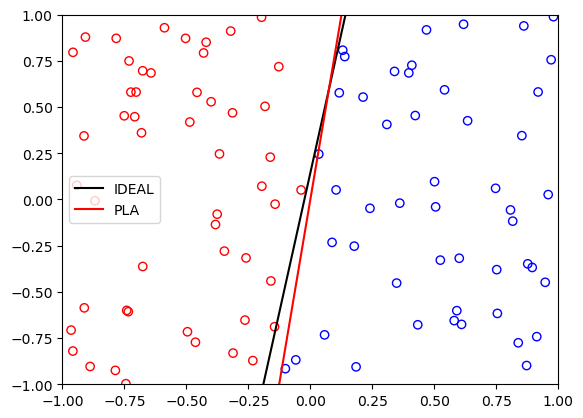

In [287]:
pla = PLA(100)
pla.run()